# GPyOpt: mixing different types of variables

### Written by Javier Gonzalez, University of Sheffield.


*Last updated Monday, 14 March 2016.*

In this notebook we are going to see how to used GPyOpt to solve optimizaiton problems in which the domain of the fucntion is defined in terms of a variety of continous and discrete variables. To this end we start by loading GPyOpt. 

In [1]:
%pylab inline  
import GPyOpt
from numpy.random import seed
seed(123)

Populating the interactive namespace from numpy and matplotlib


We will use the **Alpine1** function, that it is available in the benchmark of functions of the package. This function is defined for arbitrary dimension. In this example we will work in dimension 5. The functional form of the Alpine1 function is:

$$f(x_1,x_2,x_3,x_4,x_5)=\sum_{i=1}^{5} \lvert {x_i \sin \left( x_i \right) + 0.1 x_i} \rvert$$

We load the function from GPyOpt, assuming that noisy free values will be sampled.

In [2]:
func  = GPyOpt.objective_examples.experimentsNd.alpine1(input_dim=5) 

We will consider that variables $x_1$ and $x_2$ are continuous and defined in the interval $[-5,5]$, variable $x_3$ is takes continuous values in the interval $[-1,5]$ and the variables $x_4$ and $x_5$ are discrete and take values $\{-3,0,3\}$ and $\{-5,-1,1,5\}$ respectively. Next we define this domain to use it in GPyOpt.

In [3]:
mixed_domain =[{'name': 'var1_2', 'type': 'continuous', 'domain': (-10,10),'dimensionality': 2},
               {'name': 'var3', 'type': 'continuous', 'domain': (-8,3)},
               {'name': 'var4', 'type': 'discrete', 'domain': (-2,0,2)},
               {'name': 'var5', 'type': 'discrete', 'domain': (-1,5)}]

dd = GPyOpt.Design_space(mixed_domain)



And that's it! We can proceed now with the optimization as we have seen in previous examples. We just need to select, the model, acquisition, optimizer, etc. Given the previous domain, GPyOpt will handle for use the fact that we have discrete variables. This is taken into account in the optimization but also when generating initial values, etc. Let's see how it works when we use the Expected improvement.

In [4]:
myBopt = GPyOpt.methods.BayesianOptimization(f=func.f,                   # function to optimize       
                                             domain=mixed_domain,        # box-constrains of the problem
                                             initial_design_numdata = 20,# number data initial design
                                             acquisition_type='EI',      # Expected Improvement
                                             exact_feval = True)         # True evaluations

** GPyOpt Bayesian Optimization class initialized succesfuly **


Now, we run the optimization for 20 iterations or a maximum of 60 seconds and we show the convergence plots.

In [5]:
max_iter = 10
max_time = 60

myBopt.run_optimization(max_iter, max_time)

   ** Maximum number of iterations reached **


In [6]:
myBopt.X

array([[ 3.92938371,  2.68801917, -1.13651753,  0.        , -1.        ],
       [-4.2772133 ,  6.98863588, -6.72819765,  0.        ,  5.        ],
       [-5.46297093,  4.4891065 , -4.5098597 , -2.        ,  5.        ],
       [ 1.02629538,  2.22047021, -3.43691167,  2.        ,  5.        ],
       [ 4.3893794 ,  4.44886765,  1.52940074,  2.        ,  5.        ],
       [-1.5378708 , -3.54082172, -5.24499098,  0.        ,  5.        ],
       [ 9.61528397, -2.76422689, -2.68662309,  2.        , -1.        ],
       [ 3.69659477, -5.43473538,  2.84115764,  2.        , -1.        ],
       [-0.38136197, -4.12571907, -2.28566369, -2.        ,  5.        ],
       [-2.15764964,  2.61952248, -1.25816022,  2.        ,  5.        ],
       [-3.13643968, -8.1579012 , -6.67308467, -2.        ,  5.        ],
       [ 4.58099415, -1.32597655,  1.08974881, -2.        , -1.        ],
       [-1.22855511, -1.38274473, -1.36633859,  0.        ,  5.        ],
       [-8.80644207, -0.12629805, -2.0

In [7]:
mixed_domain

[{'dimensionality': 2,
  'domain': (-10, 10),
  'name': 'var1_2',
  'type': 'continuous'},
 {'domain': (-8, 3), 'name': 'var3', 'type': 'continuous'},
 {'domain': (-2, 0, 2), 'name': 'var4', 'type': 'discrete'},
 {'domain': (-1, 5), 'name': 'var5', 'type': 'discrete'}]

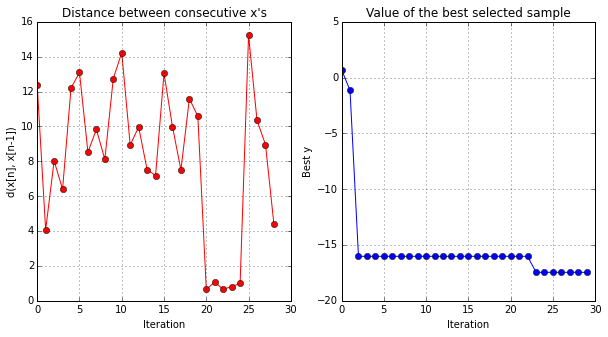

In [9]:
myBopt.plot_convergence()

The current best found value is:

In [10]:
myBopt.x_opt

array([-4.96480778,  4.66618668, -4.81984911, -2.        ,  5.        ])